In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

In [2]:
vVAE = 71
vCLF = 4
Eff_SM = 5.38e-06
use_loss = 'NLL'

xsec_inj = 7.10 #pb

In [3]:
# BSM_samples = ['Ato4l', 'Zprime', 'Wprime', 'leptoquark', 'hToTauTau', 'hChToTauNu']
BSM_samples = ['Ato4l', 'leptoquark', 'hToTauTau', 'hChToTauNu']

BSM_labels = {'Ato4l':r'$A\to 4\ell$', 
              'leptoquark':r'$LQ$', 
              'hToTauTau':r'$h\to \tau\tau$', 
              'hChToTauNu':r'$h^{+}\to \tau\nu$'}

VAE_loss = {'Tot':0, 'NLL':1, 'KL':2}

In [4]:
style_inj = '-'

BSM_colors = {'Ato4l':'r', 'leptoquark':'g', 'hToTauTau':'b', 'hChToTauNu':'k'}

BSM_injected= 'Ato4l'

In [5]:
d_inj = {}
d_inj[1] = '../VAE/VAE_HLFONLY/VAE_all-in-one_v8_ROC{ll}_dict_{n}.pkl'.format(ll=VAE_loss[use_loss], n=BSM_injected)
d_inj[10] = '../VAE/VAE_HLFONLY/VAE_all-in-one_v91_ROC{ll}_dict_{n}.pkl'.format(ll=VAE_loss[use_loss], n=BSM_injected)
d_inj[100] = '../VAE/VAE_HLFONLY/VAE_all-in-one_v9_ROC{ll}_dict_{n}.pkl'.format(ll=VAE_loss[use_loss], n=BSM_injected)

for k in d_inj.keys():
    f = open(d_inj[k], 'r')
    d_inj[k] = pickle.load(f)
    f.close()

In [6]:
d_std = ['../VAE/VAE_HLFONLY/VAE_all-in-one_v71_ROC{ll}_dict_{n}.pkl'.format(ll=VAE_loss[use_loss], n=BSM_injected),
#          '../VAE/VAE_HLFONLY/VAE_all-in-one_v7_ROC{ll}_dict_{n}.pkl'.format(ll=VAE_loss[use_loss], n=BSM_injected)
        ]

eff_BSM_std = []
AUC_std = []
eff_SM_std = 0

for f in d_std:
    f = open(f, 'r')
    d = pickle.load(f)
    f.close()
    
    eff_SM_std = d['eff_SM']
    eff_BSM_std.append(d['eff_BSM'])  
    AUC_std.append(d['roc_auc'])  


eff_BSM_std = np.array(eff_BSM_std).T
AUC_std = np.array(AUC_std)

In [7]:
mean_BSM_std = np.mean(eff_BSM_std, axis=1)

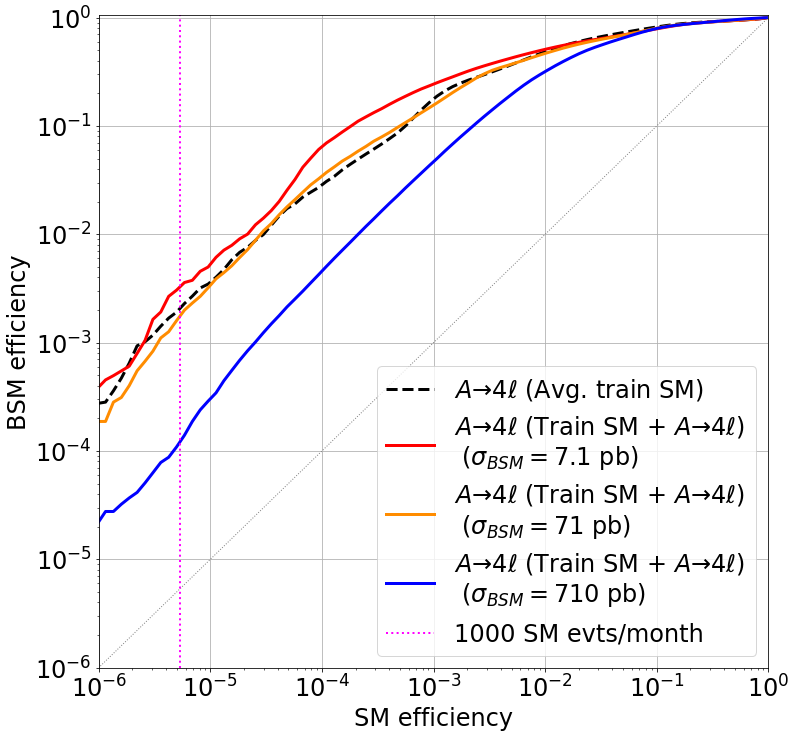

In [9]:
matplotlib.rcParams.update({'font.size': 24})
f = plt.figure(figsize=(12,12))

plt.plot(eff_SM_std, mean_BSM_std, 
         linestyle='--',
         lw=3,
         color='k',
         label='{} (Avg. train SM)'.format(BSM_labels[BSM_injected], np.mean(AUC_std), np.std(AUC_std)))

bsm_colors = ['red', 'darkorange','blue']

for i, k in enumerate(d_inj):
    d = d_inj[k]
    label='{l} (Train SM + {l}) \n ($\sigma_{{BSM}} = {a:.0f}$ pb)'.format(l=BSM_labels[BSM_injected], a=k*xsec_inj)
    if i==0:
        label='{l} (Train SM + {l}) \n ($\sigma_{{BSM}} = {a:0.1f}$ pb)'.format(l=BSM_labels[BSM_injected], a=k*xsec_inj)
    plt.plot(d['eff_SM'], d['eff_BSM'], 
             linestyle=style_inj,
             lw=3,
             color=bsm_colors[i],
             label=label)



plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle=':')
plt.plot([Eff_SM, Eff_SM], [1e-6, 1.05], color='magenta', lw=2, linestyle=':', label='1000 SM evts/month')
plt.xlim([1e-6, 1.0])
plt.ylim([1e-6, 1.05])
plt.xlabel('SM efficiency')
plt.ylabel('BSM efficiency')
plt.title('')
plt.legend(loc='lower right')
plt.yscale('log')
plt.xscale('log')
plt.grid()

plt.savefig('../fig/paper_fig/ROC_{}_injection.png'.format(BSM_injected))